## COVID-19 in US Prisons

This notebook imports COVID-19 data from [data.world](https://data.world/), which has been compiled by the Associated Press and The Marshall Project.

**Taken from the data.world page:**
# Overview

The Marshall Project, the nonprofit investigative newsroom dedicated to the U.S. criminal justice system, has partnered with The Associated Press to compile data on the prevalence of COVID-19 infection in prisons across the country. The Associated Press is sharing this data as the most comprehensive current national source of COVID-19 outbreaks in state and federal prisons.

Lawyers, criminal justice reform advocates and families of the incarcerated have worried about what was happening in prisons across the nation as coronavirus began to take hold in the communities outside. Data collected by The Marshall Project and AP shows that hundreds of thousands of prisoners, workers, correctional officers and staff have caught the illness as prisons became the center of some of the country’s largest outbreaks. And thousands of people — most of them incarcerated — have died.

In December, as COVID-19 cases spiked across the U.S., the news organizations also shared cumulative rates of infection among prison populations, to better gauge the total effects of the pandemic on prison populations. The analysis found that by mid-December, one in five state and federal prisoners in the United States had tested positive for the coronavirus -- a rate more than four times higher than the general population.

In [1]:
# Imports
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Data imports
df_prisoncases = pd.read_csv('https://query.data.world/s/tp7acte5rwl6pw2yuyvkxnw3xwtq64')
df_prisonrates = pd.read_csv('https://query.data.world/s/7gtwvf7dkarwtdm336heetyv2ooyyz')
df_prisonpop = pd.read_csv('https://query.data.world/s/3o2mmakqdaprodkxbitvt5rnmdpeij')
df_staffpop = pd.read_csv('https://query.data.world/s/zz6zpqsvllsrg4gzvmervygkje7j7o')

# Checking the Data: Prison Cases

#### "Prison Cases "The time series data is aggregated to the system level; there is one record for each prison agency on each date of collection. Not all departments could provide data for the exact date requested, and the data indicates the date for the figures."

In [3]:
df_prisoncases.dtypes

name                              object
abbreviation                      object
staff_tests                      float64
staff_tests_with_multiples       float64
total_staff_cases                float64
staff_recovered                  float64
total_staff_deaths               float64
staff_partial_dose               float64
staff_full_dose                  float64
prisoner_tests                   float64
prisoner_tests_with_multiples    float64
total_prisoner_cases             float64
prisoners_recovered              float64
total_prisoner_deaths            float64
prisoners_partial_dose           float64
prisoners_full_dose              float64
as_of_date                        object
notes                             object
dtype: object

In [4]:
(df_prisoncases.isnull().sum()/df_prisoncases.shape[0])*100

name                              0.000000
abbreviation                      0.000000
staff_tests                      87.094474
staff_tests_with_multiples       82.103387
total_staff_cases                 7.736185
staff_recovered                  38.003565
total_staff_deaths               15.401070
staff_partial_dose               86.809269
staff_full_dose                  88.948307
prisoner_tests                   57.040998
prisoner_tests_with_multiples    55.721925
total_prisoner_cases              3.458111
prisoners_recovered              33.048128
total_prisoner_deaths             4.563280
prisoners_partial_dose           82.388592
prisoners_full_dose              84.278075
as_of_date                        1.354724
notes                            63.850267
dtype: float64

In [5]:
#dropping empty row (index 0)
df_prisoncases.drop(index=0, inplace=True)

In [6]:
#dropping null as_of_date
df_prisoncases.dropna(subset = ['as_of_date'], inplace=True)

In [7]:
df_prisoncases.head()

,name,abbreviation,staff_tests,staff_tests_with_multiples,total_staff_cases,staff_recovered,total_staff_deaths,staff_partial_dose,staff_full_dose,prisoner_tests,prisoner_tests_with_multiples,total_prisoner_cases,prisoners_recovered,total_prisoner_deaths,prisoners_partial_dose,prisoners_full_dose,as_of_date,notes
1,Alaska,AK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29981.0,2396.0,NaN,5.0,2518.0,1598.0,04/05/2021,NaN
2,Arizona,AZ,NaN,NaN,2742.0,2731.0,NaN,NaN,NaN,43652.0,NaN,12215.0,12137.0,53.0,NaN,NaN,04/06/2020,We have been told vaccinations have begun in t...
3,Arkansas,AR,NaN,NaN,NaN,NaN,4.0,1421.0,1091.0,NaN,NaN,11245.0,11199.0,52.0,82.0,0.0,04/06/2021,Vaccine numbers as of 4/6
4,California,CA,NaN,NaN,NaN,NaN,NaN,27030.0,24811.0,121456.0,NaN,NaN,48362.0,218.0,62730.0,43760.0,04/06/2021,NaN
5,Colorado,CO,NaN,NaN,1633.0,NaN,NaN,2906.0,NaN,19235.0,196517.0,8800.0,NaN,29.0,7556.0,NaN,04/06/2021,NaN


### Convert to datetime
##### Prison Cases: Date column is an object datatype, we will need to convert it to the timeseries datatype

In [8]:
#converting columns to date time
df_prisoncases['as_of_date'] = pd.to_datetime(df_prisoncases['as_of_date'])

In [9]:
#setting column to index
df_prisoncases.set_index('as_of_date', inplace=True)

In [10]:
#sorting index
df_prisoncases.sort_index(inplace=True, ascending=False)

In [11]:
#Checking work
df_prisoncases.head(3)

,name,abbreviation,staff_tests,staff_tests_with_multiples,total_staff_cases,staff_recovered,total_staff_deaths,staff_partial_dose,staff_full_dose,prisoner_tests,prisoner_tests_with_multiples,total_prisoner_cases,prisoners_recovered,total_prisoner_deaths,prisoners_partial_dose,prisoners_full_dose,notes
as_of_date,,,,,,,,,,,,,,,,,
2021-04-09,Nebraska,NE,NaN,NaN,557.0,549.0,NaN,NaN,NaN,3676.0,6776.0,982.0,976.0,6.0,NaN,NaN,Staff case totals from 4/8
2021-04-09,West Virginia,WV,NaN,12957.0,476.0,467.0,1.0,834.0,780.0,NaN,10063.0,1593.0,1540.0,9.0,NaN,1011.0,Prisoners are receiving the single-shot J&J va...
2021-04-09,Rhode Island,RI,NaN,NaN,412.0,410.0,1.0,NaN,NaN,NaN,NaN,1200.0,1192.0,2.0,NaN,NaN,Subtracting 4 presumed positives among prisone...


In [12]:
df_prisoncases.loc['2020'].head()

,name,abbreviation,staff_tests,staff_tests_with_multiples,total_staff_cases,staff_recovered,total_staff_deaths,staff_partial_dose,staff_full_dose,prisoner_tests,prisoner_tests_with_multiples,total_prisoner_cases,prisoners_recovered,total_prisoner_deaths,prisoners_partial_dose,prisoners_full_dose,notes
as_of_date,,,,,,,,,,,,,,,,,
2020-12-31,Rhode Island,RI,NaN,NaN,311.0,284.0,1.0,113.0,NaN,NaN,NaN,984.0,864.0,2.0,130.0,NaN,Subtracting 4 presumed positives among prisone...
2020-12-30,Florida,FL,NaN,NaN,4389.0,3767.0,NaN,0.0,0.0,NaN,NaN,17537.0,17030.0,191.0,0.0,0.0,NaN
2020-12-30,Massachusetts,MA,NaN,NaN,706.0,NaN,NaN,0.0,0.0,NaN,22882.0,2085.0,NaN,12.0,0.0,0.0,Massachusetts later revised its number of test...
2020-12-30,Montana,MT,NaN,NaN,262.0,NaN,0.0,0.0,0.0,NaN,NaN,1124.0,NaN,6.0,0.0,0.0,NaN
2020-12-29,Washington,WA,NaN,NaN,790.0,NaN,1.0,NaN,NaN,8510.0,9936.0,4330.0,1945.0,5.0,NaN,NaN,Vaccinations began on 12/29 but they don't hav...


## Exploring Missing Data
The data is system aggregated, so each row is a prison system with accompanying time series data. 

In [13]:
#percent of missing data in prison cases
(df_prisoncases.isnull().sum()/df_prisoncases.shape[0])*100

name                              0.000000
abbreviation                      0.000000
staff_tests                      86.917239
staff_tests_with_multiples       81.857608
total_staff_cases                 6.469100
staff_recovered                  37.152150
total_staff_deaths               14.239248
staff_partial_dose               86.628117
staff_full_dose                  88.796531
prisoner_tests                   56.451030
prisoner_tests_with_multiples    55.113842
total_prisoner_cases              2.132273
prisoners_recovered              32.128659
total_prisoner_deaths             3.252620
prisoners_partial_dose           82.146729
prisoners_full_dose              84.062161
notes                            63.679075
dtype: float64

In [14]:
# Drop staff_tests, staff_tests_with_multiples,staff_partial_dose,staff_full_dose, prisoner_tests, prisoner_tests_with_multiples
# prisoners_partial_dose, prisoners_full_dose, notes

In [15]:
df_prisoncases.drop(columns = ['staff_tests','staff_tests_with_multiples',
                               'staff_partial_dose','staff_full_dose',
                               'prisoner_tests', 'prisoner_tests_with_multiples',
                               'prisoners_partial_dose','prisoners_full_dose', 'notes'], inplace = True)

In [16]:
df_prisoncases.tail()

,name,abbreviation,total_staff_cases,staff_recovered,total_staff_deaths,total_prisoner_cases,prisoners_recovered,total_prisoner_deaths
as_of_date,,,,,,,,
2020-03-26,Minnesota,MN,0.0,NaN,0.0,0.0,NaN,0.0
2020-03-26,Mississippi,MS,NaN,NaN,0.0,0.0,NaN,0.0
2020-03-25,Illinois,IL,3.0,NaN,0.0,3.0,NaN,0.0
2020-03-24,Delaware,DE,0.0,NaN,0.0,0.0,NaN,0.0
2020-03-23,Washington,WA,1145.0,NaN,2.0,6187.0,6169.0,14.0


In [17]:
(df_prisoncases.isnull().sum()/df_prisoncases.shape[0])*100

name                      0.000000
abbreviation              0.000000
total_staff_cases         6.469100
staff_recovered          37.152150
total_staff_deaths       14.239248
total_prisoner_cases      2.132273
prisoners_recovered      32.128659
total_prisoner_deaths     3.252620
dtype: float64

In [18]:
df_prisoncases.shape

(2767, 8)

In [30]:
grouped = df_prisoncases.groupby(by='name').sum()
grouped

,total_staff_cases,staff_recovered,total_staff_deaths,total_prisoner_cases,prisoners_recovered,total_prisoner_deaths
name,,,,,,
Alabama,24612.0,19471.0,88.0,31773.0,26681.0,1439.0
Alaska,3845.0,55.0,0.0,40276.0,18.0,82.0
Arizona,57890.0,51849.0,3.0,223673.0,185738.0,1162.0
Arkansas,5923.0,3212.0,100.0,343292.0,310429.0,1853.0
California,294626.0,243699.0,490.0,1046571.0,964420.0,4677.0
Colorado,30978.0,2081.0,0.0,178992.0,17441.0,568.0
Connecticut,36088.0,30867.0,0.0,103449.0,94433.0,495.0
Delaware,6057.0,5044.0,14.0,18975.0,18746.0,328.0
Federal,151236.0,101448.0,99.0,951529.0,910367.0,7226.0


In [33]:
df_prisoncases.head()

,name,abbreviation,total_staff_cases,staff_recovered,total_staff_deaths,total_prisoner_cases,prisoners_recovered,total_prisoner_deaths
as_of_date,,,,,,,,
2021-04-09,Nebraska,NE,557.0,549.0,NaN,982.0,976.0,6.0
2021-04-09,West Virginia,WV,476.0,467.0,1.0,1593.0,1540.0,9.0
2021-04-09,Rhode Island,RI,412.0,410.0,1.0,1200.0,1192.0,2.0
2021-04-08,Michigan,MI,4039.0,NaN,5.0,26156.0,24526.0,140.0
2021-04-08,Maine,ME,59.0,58.0,0.0,168.0,166.0,1.0


# New Jersey

In [40]:
New_Jersey = pd.DataFrame(df_prisoncases[df_prisoncases['name']=='New Jersey'])

In [50]:
New_Jersey.sort_index(ascending = True, inplace = True)

In [55]:
New_Jersey.isnull().sum()

name                      0
abbreviation              0
total_staff_cases         0
staff_recovered          44
total_staff_deaths       42
total_prisoner_cases      0
prisoners_recovered      55
total_prisoner_deaths     1
dtype: int64

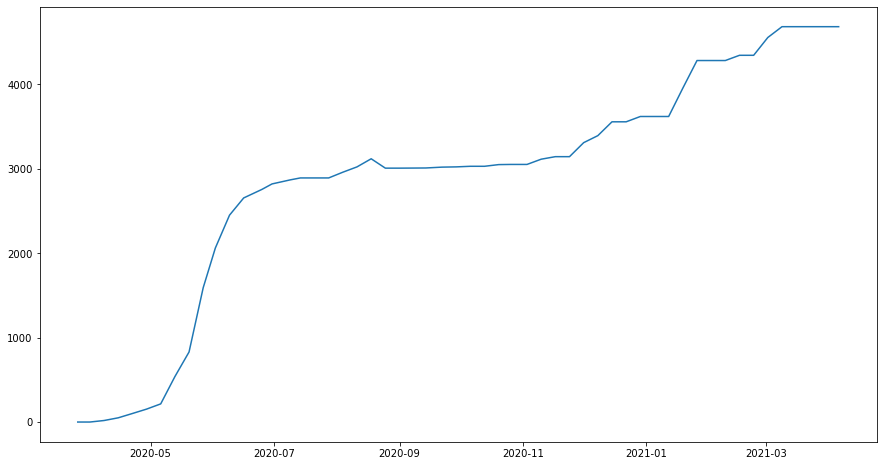

In [54]:
#Plot prisoner cases over time
plt.figure(figsize = (15,8))
plt.plot(New_Jersey['total_prisoner_cases'])

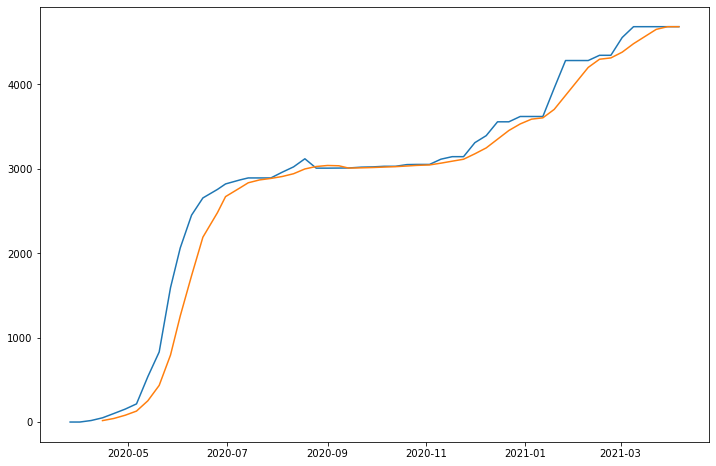

In [60]:
#Plot prisoner cases over time + rolling average (4 weeks)

plt.figure(figsize=(12,8))
plt.plot(New_Jersey['total_prisoner_cases'])
plt.plot(New_Jersey['total_prisoner_cases'].rolling(4).mean())

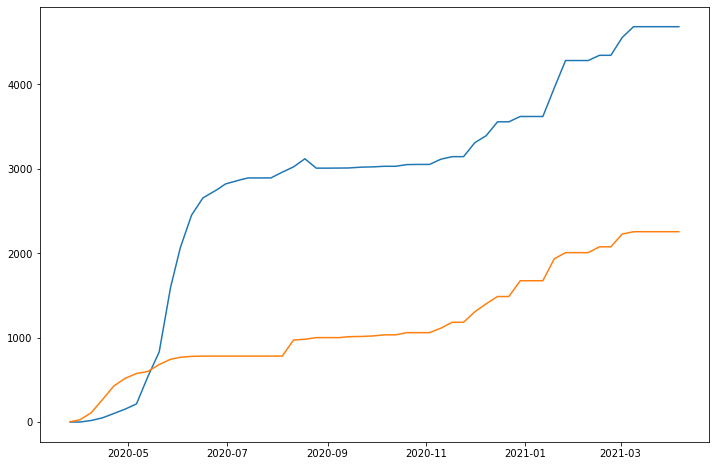

In [62]:
#Plot Prisoner vs. Staff
plt.figure(figsize=(12,8))
plt.plot(New_Jersey['total_prisoner_cases'])
plt.plot(New_Jersey['total_staff_cases'])

In [70]:
new_jersey_prisoner_population = pd.DataFrame(df_prisonpop[df_prisonpop['name']=='New Jersey'])

In [64]:
df_prisonrates.head()

,name,latest_week,cumulative_prisoner_cases,prisoner_cases_pct,prisoner_case_rate,cumulative_prisoner_deaths,prisoner_deaths_pct,prisoner_death_rate,cumulative_staff_cases,staff_cases_pct,staff_case_rate,cumulative_staff_deaths,staff_deaths_pct,staff_death_rate
0,Alabama,04/06/2021,1611,0.076300,1 in 13 prisoners,64,0.003031,1 in 330 prisoners,1039,0.273998,1 in 4 staff,3,0.000791,1 in 1264 staff
1,Alaska,04/06/2021,2396,0.501675,1 in 2 prisoners,5,0.001047,1 in 955 prisoners,313,0.211344,1 in 5 staff,0,0.000000,0
2,Arizona,04/06/2021,12215,0.288362,2 in 7 prisoners,53,0.001251,1 in 799 prisoners,2742,0.301484,1 in 3 staff,1,0.000110,1 in 9095 staff
3,Arkansas,04/06/2021,11245,0.642498,2 in 3 prisoners,52,0.002971,1 in 337 prisoners,813,0.148901,1 in 7 staff,4,0.000733,1 in 1365 staff
4,California,04/06/2021,49221,0.418407,2 in 5 prisoners,218,0.001853,1 in 540 prisoners,16037,0.252667,1 in 4 staff,26,0.000410,1 in 2441 staff


In [ ]:
#Using prisoner population data to create a new table with just new jersey

In [75]:
#dropping as of date columns
new_jersey_prisoner_population.drop(columns= ['as_of_date_march', 'as_of_date_april', 'as_of_date_june', 'as_of_date_july', 'as_of_date_aug', 'as_of_date_sept', 'as_of_date_oct', 'as_of_date_nov', 'as_of_date_dec'], inplace=True)




In [84]:
#Saving as a transposed Data Frame
new_jersey_prisoner_population = pd.DataFrame(new_jersey_prisoner_population.T)

In [87]:
#Renaming the columns to population
new_jersey_prisoner_population.rename(columns = {29: 'population'}, inplace=True)

In [100]:
#Dropping erroneous rows from index
new_jersey_prisoner_population.drop(index = ['name', 'abbreviation'], inplace=True)

In [105]:
#renaming the index
new_jersey_prisoner_population.index.rename('index', inplace=True)

In [107]:
#Month dictionary
month_dict = {'march_pop': 'march-2020', 'april_pop': 'april-2020', 'june_pop': 'june-2020', 'july_pop': 'july-2020', 'aug_pop': 'august-2020', 'sept_pop': 'september-2020', 'oct_pop': 'october-2020', 'nov_pop': 'november-2020', 'dec_pop': 'december-2020'}

In [110]:
#renaming the index
new_jersey_prisoner_population.rename(index = month_dict, inplace=True)

In [115]:
#Change to date time data type
new_jersey_prisoner_population.index = pd.to_datetime(new_jersey_prisoner_population.index)

In [195]:
#drop unecessary columns
New_Jersey.drop(columns=['name', 'abbreviation'], inplace = True)

In [198]:
New_Jersey['total_prisoner_deaths'].fillna(value = 0,inplace=True)

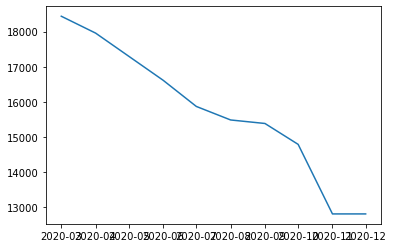

In [119]:
plt.plot(new_jersey_prisoner_population['population'])


In [154]:
New_Jersey.index

DatetimeIndex(['2020-03-26', '2020-04-01', '2020-04-08', '2020-04-15',
               '2020-04-22', '2020-04-29', '2020-05-06', '2020-05-13',
               '2020-05-20', '2020-05-27', '2020-06-02', '2020-06-09',
               '2020-06-16', '2020-06-25', '2020-06-30', '2020-07-09',
               '2020-07-14', '2020-07-21', '2020-07-28', '2020-08-04',
               '2020-08-11', '2020-08-18', '2020-08-25', '2020-09-01',
               '2020-09-08', '2020-09-14', '2020-09-22', '2020-09-29',
               '2020-10-06', '2020-10-13', '2020-10-20', '2020-10-26',
               '2020-11-03', '2020-11-10', '2020-11-17', '2020-11-24',
               '2020-12-01', '2020-12-08', '2020-12-15', '2020-12-22',
               '2020-12-29', '2021-01-05', '2021-01-12', '2021-01-19',
               '2021-01-26', '2021-02-02', '2021-02-09', '2021-02-16',
               '2021-02-23', '2021-03-02', '2021-03-09', '2021-03-16',
               '2021-03-23', '2021-03-30', '2021-04-06'],
              dtype

In [199]:
New_Jersey.head()

,total_staff_cases,staff_recovered,total_staff_deaths,total_prisoner_cases,prisoners_recovered,total_prisoner_deaths
as_of_date,,,,,,
2020-03-26,4.0,NaN,0.0,0.0,NaN,0.0
2020-04-01,26.0,NaN,0.0,0.0,NaN,0.0
2020-04-08,110.0,NaN,NaN,18.0,NaN,0.0
2020-04-15,266.0,NaN,1.0,50.0,NaN,5.0
2020-04-22,427.0,NaN,2.0,101.0,NaN,16.0


In [158]:
New_jersey_monthly = pd.DataFrame(New_Jersey.groupby(by=[New_Jersey.index.month, New_Jersey.index.year]).sum())

In [177]:
New_jersey_monthly

total_staff_cases  staff_recovered  total_staff_deaths  \
as_of_date as_of_date                                                           
1          2021                   7288.0              0.0                 0.0   
2          2021                   8166.0              0.0                 0.0   
3          2020                      4.0              0.0                 0.0   
           2021                  11247.0              0.0                 0.0   
4          2020                   1347.0              0.0                 5.0   
           2021                   2255.0              0.0                 0.0   
5          2020                   2598.0              0.0                11.0   
6          2020                   3888.0           1365.0                12.0   
7          2020                   3124.0           1524.0                 0.0   
8          2020                   3733.0           2750.0                 0.0   
9          2020                   5045.0           1915.0                 0.0   
10         2020                   4184.0           1003.0                 0.0   
11         2020                   4535.0              0.0                 0.0   
12         2020                   7356.0           1189.0                 0.0   

                       total_prisoner_cases  prisoners_recovered  \
as_of_date as_of_date                                              
1          2021                     15479.0                  0.0   
2          2021                     17256.0                  0.0   
3          2020                         0.0                  0.0   
           2021                     23292.0                  0.0   
4          2020                       322.0                  0.0   
           2021                      4684.0                  0.0   
5          2020                      3175.0                  0.0   
6          2020                     12745.0                  0.0   
7          2020                     11545.0                  0.0   
8          2020                     12110.0                  0.0   
9          2020                     15070.0                  0.0   
10         2020                     12162.0                  0.0   
11         2020                     12454.0                  0.0   
12         2020                     17437.0                  0.0   

                       total_prisoner_deaths  
as_of_date as_of_date                         
1          2021                        208.0  
2          2021                        210.0  
3          2020                          0.0  
           2021                        265.0  
4          2020                         50.0  
           2021                         53.0  
5          2020                        166.0  
6          2020                        230.0  
7          2020                        193.0  
8          2020                        196.0  
9          2020                        245.0  
10         2020                        208.0  
11         2020                        208.0  
12         2020                        260.0

# Saving to CSV

In [200]:
New_Jersey.to_csv('./cleaned_data/new_jersey')

In [189]:
new_jersey_prisoner_population.to_csv('./cleaned_data/new_jersey_prisoner_population')